## Imports

In [34]:
import cifar10
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### setting the data path.

In [4]:
cifar10.data_path

'data/CIFAR-10/'

### Downloading the data.

In [5]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


### Loading the class names.

In [41]:
classes=cifar10.load_class_names()
classes

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Loading the training and testing data.

In [7]:
train_img, train_cls, train_lb= cifar10.load_training_data()
test_img,  test_cls,  test_lb=  cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


### Getting the shapes.

In [8]:
print(train_img.shape)
print(train_cls.shape)
print(train_lb.shape)

(50000, 32, 32, 3)
(50000,)
(50000, 10)


In [9]:
print(test_img.shape)
print(test_cls.shape)
print(test_lb.shape)

(10000, 32, 32, 3)
(10000,)
(10000, 10)


### Viewing first 100 images.

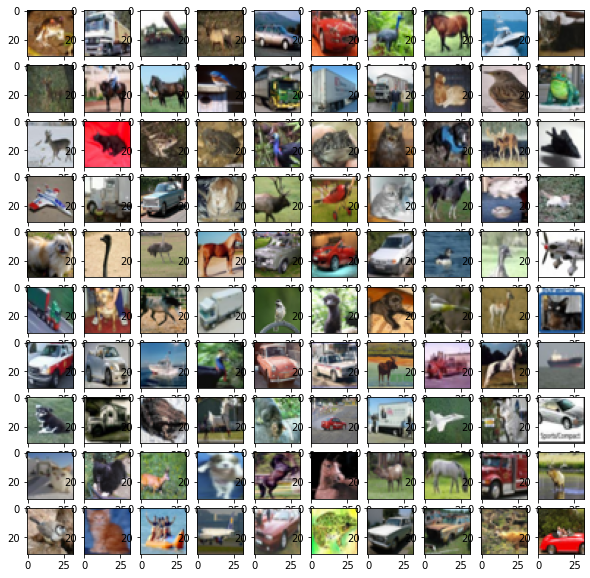

In [10]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(train_img[i])
plt.show()

### Reshaping the images.

In [11]:
reshaped_img_train=train_img.reshape((50000,32*32*3))
pca=PCA()
pca.fit(reshaped_img_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
eigen_val=pca.explained_variance_

### Getting optimal value of k

In [13]:
total=sum(eigen_val)
k=0
curr=0
while curr/total<0.99:
    curr+=eigen_val[k]
    k+=1
k

658

### Transforming the data.

In [14]:
pca=PCA(n_components=k)
img_train_transformed=pca.fit_transform(reshaped_img_train)
img_train_transformed.shape

(50000, 658)

In [15]:
img_approx=pca.inverse_transform(img_train_transformed)
img_approx=img_approx.reshape((50000,32,32,3))
img_approx.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

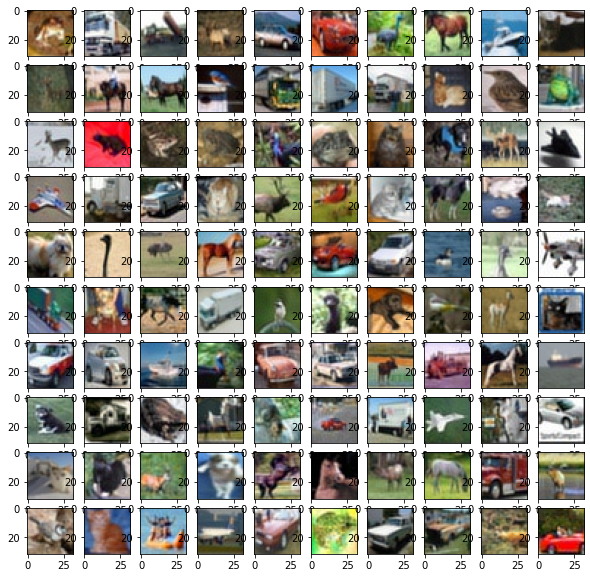

In [16]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(img_approx[i])
plt.show()

In [17]:
img_test_reshaped=test_img.reshape((10000,32*32*3))
img_test_transformed=pca.transform(img_test_reshaped)
img_test_transformed.shape

(10000, 658)

### Running possible algorithms.

In [18]:
clf=RandomForestClassifier()
clf.fit(img_train_transformed,train_cls)
y_pred=clf.predict(img_test_transformed)
print(classification_report(test_cls,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.49      0.47      1000
           1       0.41      0.50      0.45      1000
           2       0.27      0.24      0.26      1000
           3       0.27      0.24      0.25      1000
           4       0.35      0.37      0.36      1000
           5       0.33      0.30      0.31      1000
           6       0.43      0.44      0.44      1000
           7       0.40      0.32      0.36      1000
           8       0.49      0.54      0.51      1000
           9       0.39      0.41      0.40      1000

    accuracy                           0.38     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000



In [35]:
clf2=LogisticRegression(max_iter=1000)
clf2.fit(img_train_transformed,train_cls)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
y_pred_clf2=clf2.predict(img_test_transformed)
print(classification_report(test_cls,y_pred_clf2))

              precision    recall  f1-score   support

           0       0.45      0.48      0.47      1000
           1       0.47      0.47      0.47      1000
           2       0.32      0.28      0.30      1000
           3       0.28      0.26      0.27      1000
           4       0.35      0.29      0.32      1000
           5       0.32      0.33      0.33      1000
           6       0.41      0.47      0.43      1000
           7       0.45      0.44      0.44      1000
           8       0.49      0.54      0.51      1000
           9       0.44      0.46      0.45      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000



In [37]:
clf3=KNeighborsClassifier(n_jobs=-1)
clf3.fit(img_train_transformed,train_cls)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
y_pred_clf3=clf3.predict(img_test_transformed)
print(classification_report(test_cls,y_pred_clf3))

              precision    recall  f1-score   support

           0       0.39      0.55      0.45      1000
           1       0.65      0.22      0.32      1000
           2       0.23      0.45      0.30      1000
           3       0.29      0.21      0.24      1000
           4       0.24      0.51      0.33      1000
           5       0.40      0.22      0.28      1000
           6       0.35      0.27      0.31      1000
           7       0.67      0.21      0.32      1000
           8       0.41      0.66      0.50      1000
           9       0.71      0.15      0.24      1000

    accuracy                           0.34     10000
   macro avg       0.43      0.34      0.33     10000
weighted avg       0.43      0.34      0.33     10000



In [45]:
predictions=[]
for i in range(len(y_pred_clf2)):
    predictions.append(classes[y_pred_clf2[i]])


### Saving predictions in csv file.

In [46]:
np.savetxt("predictions.csv", predictions, delimiter=',', fmt="%s")